In [18]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [16]:
df = pd.read_csv('Passengers.csv', parse_dates=['Month'], index_col='Month')

# Qno 1

Root Mean Squared Error on Validation Set: 32.348494246255115


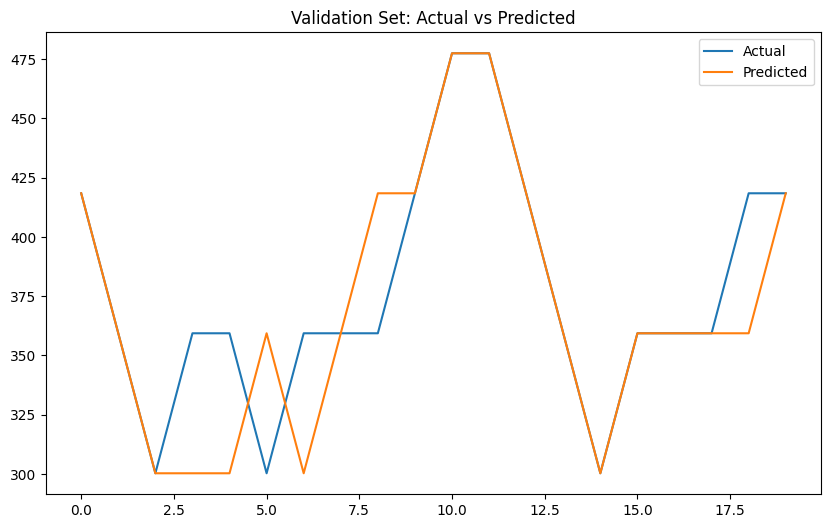

Root Mean Squared Error on Test Set: 37.35282372190889


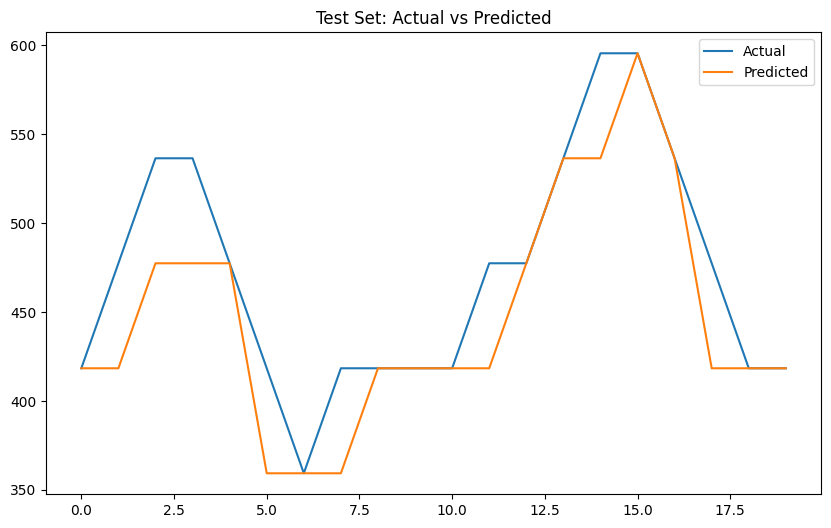

In [27]:
# Write  a  program  to  forecast  the  number  of  passengers  travelling  in  an  airline  (The dataset  is  attached) using  fuzzy  time  series  forecasting  employing Linear  Regression model.Use 70-15-15% ratio in train-validation-test sets.Specification:The universe of discourse (UOD)oftime series isobtained by taking a practical 10% decrement and 10% increment on the minimum and maximum value of the time series. Once the UOD for the time series is identified, it is split into several equal length intervals. Set length of interval as 10. Then the time series is converted to a fuzzy time series by exchanging each observation of the time series by the index of the  belonging  interval  of  the  observation. After  the data  is  fuzzified,  the  high  order fuzzy  logical  relationships  (FLRs) are established.  Here,  the  order  of  the  fuzzy  TSF model is  set  to  12. Then  theFLRsare modelledusing  Linear  Regression.  Once  the fuzzified forecasts are obtained, it is defuzzified and forecasting accuracy ismeasured.

min_val = df['#Passengers'].min()
max_val = df['#Passengers'].max()
UOD = [min_val - min_val * 0.1, max_val + max_val * 0.1]

def fuzzify(data, UOD, interval_length=10):
    intervals = np.linspace(UOD[0], UOD[1], interval_length + 1)
    fuzzified_data = np.zeros(len(data))
    for i in range(len(data)):
        for j in range(1, len(intervals)):
            if data[i] <= intervals[j]:
                fuzzified_data[i] = j - 1
                break
    return fuzzified_data

def defuzzify(data, UOD, interval_length=10):
    intervals = np.linspace(UOD[0], UOD[1], interval_length + 1)
    defuzzified_data = np.zeros(len(data))
    for i in range(len(data)):
        ind = int(data[i])
        defuzzified_data[i] = intervals[ind] + (intervals[ind + 1] - intervals[ind]) / 2
    return defuzzified_data

fuzzified_data = fuzzify(df['#Passengers'].values, UOD)

def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 12
X, y = create_dataset(fuzzified_data, time_steps)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_val_pred_defuzz = defuzzify(y_val_pred, UOD)
y_val_defuzz = defuzzify(y_val, UOD)

rmse = np.sqrt(mean_squared_error(y_val_defuzz, y_val_pred_defuzz))
print('Root Mean Squared Error on Validation Set:', rmse)

plt.figure(figsize=(10, 6))
plt.plot(y_val_defuzz, label='Actual')
plt.plot(y_val_pred_defuzz, label='Predicted')
plt.title('Validation Set: Actual vs Predicted')
plt.legend()
plt.show()

y_test_pred = model.predict(X_test)
y_test_pred_defuzz = defuzzify(y_test_pred, UOD)
y_test_defuzz = defuzzify(y_test, UOD)

rmse_test = np.sqrt(mean_squared_error(y_test_defuzz, y_test_pred_defuzz))
print('Root Mean Squared Error on Test Set:', rmse_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_defuzz, label='Actual')
plt.plot(y_test_pred_defuzz, label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.show()

Root Mean Squared Error on Validation Set: 32.348494246255115


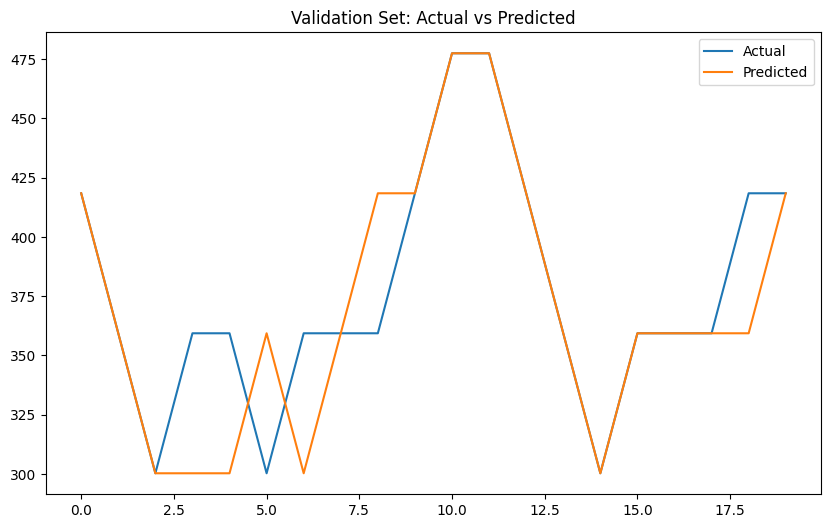

Root Mean Squared Error on Test Set: 37.35282372190889


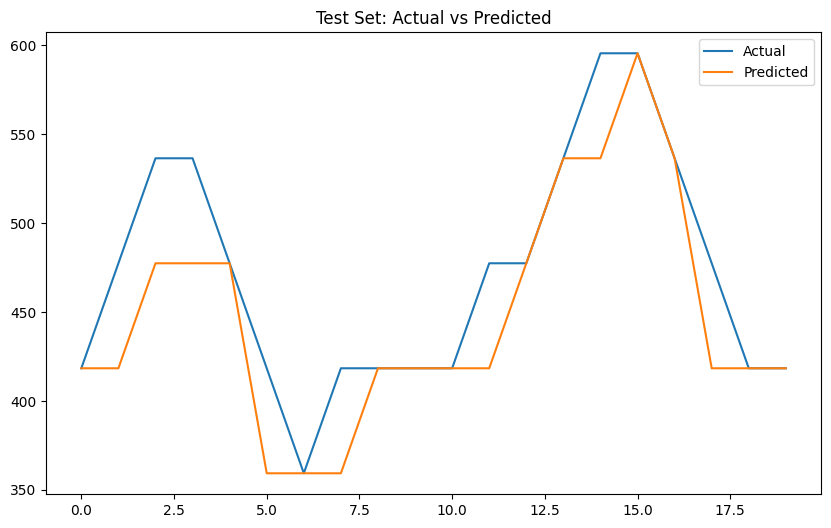

In [28]:
# Write  a  program  to  forecast  the  number  of  passengers  travelling  in  an  airline  (The dataset  is  attached) using  fuzzy  time  series  forecasting  employing Linear  Regression model.Use 70-15-15% ratio in train-validation-test sets.Specification:The universe of discourse (UOD)oftime series isobtained by taking a practical 10% decrement and 10% increment on the minimum and maximum value of the time series. Once the UOD for the time series is identified, it is split into several equal length intervals. Set length of interval as 10. Then the time series is converted to a fuzzy time series by exchanging each observation of the time series by the index of the  belonging  interval  of  the  observation. After  the data  is  fuzzified,  the  high  order fuzzy  logical  relationships  (FLRs) are established.  Here,  the  order  of  the  fuzzy  TSF model is  set  to  12. Then  theFLRsare modelledusing  Linear  Regression.  Once  the fuzzified forecasts are obtained, it is defuzzified and forecasting accuracy ismeasured.

def normalize_data(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std, mean, std

def denormalize_data(data, mean, std):
    return data * std + mean

min_val = df['#Passengers'].min()
max_val = df['#Passengers'].max()
UOD = [min_val - min_val * 0.1, max_val + max_val * 0.1]

def fuzzify(data, UOD, interval_length=10):
    intervals = np.linspace(UOD[0], UOD[1], interval_length + 1)
    fuzzified_data = np.zeros(len(data))
    for i in range(len(data)):
        for j in range(1, len(intervals)):
            if data[i] <= intervals[j]:
                fuzzified_data[i] = j - 1
                break
    return fuzzified_data

def defuzzify(data, UOD, interval_length=10):
    intervals = np.linspace(UOD[0], UOD[1], interval_length + 1)
    defuzzified_data = np.zeros(len(data))
    for i in range(len(data)):
        ind = int(data[i])
        defuzzified_data[i] = intervals[ind] + (intervals[ind + 1] - intervals[ind]) / 2
    return defuzzified_data

fuzzified_data = fuzzify(df['#Passengers'].values, UOD)

# Normalize the fuzzified data
fuzzified_data_normalized, mean_fuzzified, std_fuzzified = normalize_data(fuzzified_data)

def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 12
X, y = create_dataset(fuzzified_data_normalized, time_steps)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

# Denormalize the predicted and actual values for the validation set
y_val_pred_denorm = denormalize_data(y_val_pred, mean_fuzzified, std_fuzzified)
y_val_denorm = denormalize_data(y_val, mean_fuzzified, std_fuzzified)

# Defuzzify the denormalized predictions and actual values
y_val_pred_defuzz = defuzzify(y_val_pred_denorm, UOD)
y_val_defuzz = defuzzify(y_val_denorm, UOD)

rmse = np.sqrt(mean_squared_error(y_val_defuzz, y_val_pred_defuzz))
print('Root Mean Squared Error on Validation Set:', rmse)

plt.figure(figsize=(10, 6))
plt.plot(y_val_defuzz, label='Actual')
plt.plot(y_val_pred_defuzz, label='Predicted')
plt.title('Validation Set: Actual vs Predicted')
plt.legend()
plt.show()

y_test_pred = model.predict(X_test)

# Denormalize the predicted and actual values for the test set
y_test_pred_denorm = denormalize_data(y_test_pred, mean_fuzzified, std_fuzzified)
y_test_denorm = denormalize_data(y_test, mean_fuzzified, std_fuzzified)

# Defuzzify the denormalized predictions and actual values
y_test_pred_defuzz = defuzzify(y_test_pred_denorm, UOD)
y_test_defuzz = defuzzify(y_test_denorm, UOD)

rmse_test = np.sqrt(mean_squared_error(y_test_defuzz, y_test_pred_defuzz))
print('Root Mean Squared Error on Test Set:', rmse_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_defuzz, label='Actual')
plt.plot(y_test_pred_defuzz, label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.show()

# Qno 2

Simulation: 1
1/1 [==============================] - 0s 19ms/step
Simulation: 2
1/1 [==============================] - 0s 18ms/step
Simulation: 3
1/1 [==============================] - 0s 18ms/step
Simulation: 4
1/1 [==============================] - 0s 20ms/step
Simulation: 5
1/1 [==============================] - 0s 19ms/step
Simulation: 6
1/1 [==============================] - 0s 19ms/step
Simulation: 7
1/1 [==============================] - 0s 18ms/step
Simulation: 8
1/1 [==============================] - 0s 17ms/step
Simulation: 9
1/1 [==============================] - 0s 20ms/step
Simulation: 10
1/1 [==============================] - 0s 19ms/step
Mean Root Mean Squared Error on Validation Set over 10 simulations: 40.7618875482162
Mean Root Mean Squared Error on Test Set over 10 simulations: 48.463452683265764


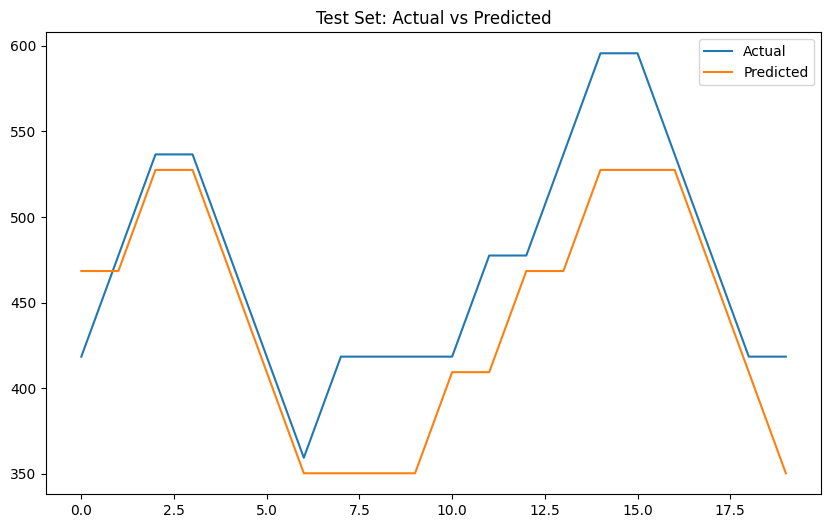

In [46]:
# Rewrite the question no. 1employing LSTMmodel.The LSTM model has four layers: First  Layer-Input  Layer,  Second  Layer–LSTM Layer  with  64  LSTM  units,  Third Layer –Fully  Connected  Layer  with 32 neurons,  Fourth  Layer–Output Layer  with single neuron. Repeat the simulations for 10 times and obtain the mean RMSE over 10 independent simulations

def normalize_data(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std, mean, std

def denormalize_data(data, mean, std):
    return data * std + mean

min_val = df['#Passengers'].min()
max_val = df['#Passengers'].max()
UOD = [min_val - min_val * 0.1, max_val + max_val * 0.1]

def fuzzify(data, UOD, interval_length=10):
    intervals = np.linspace(UOD[0], UOD[1], interval_length + 1)
    fuzzified_data = np.zeros(len(data))
    for i in range(len(data)):
        for j in range(1, len(intervals)):
            if data[i] <= intervals[j]:
                fuzzified_data[i] = j - 1
                break
    return fuzzified_data

def defuzzify(data, UOD, interval_length=10):
    intervals = np.linspace(UOD[0], UOD[1], interval_length + 1)
    defuzzified_data = np.zeros(len(data))
    for i in range(len(data)):
        ind = int(data[i].item())  # Convert single value array to scalar
        defuzzified_data[i] = intervals[ind] + (intervals[ind + 1] - intervals[ind]) / 2
    return defuzzified_data



fuzzified_data = fuzzify(df['#Passengers'].values, UOD)

# Normalize the fuzzified data
fuzzified_data_normalized, mean_fuzzified, std_fuzzified = normalize_data(fuzzified_data)

def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 12
X, y = create_dataset(fuzzified_data_normalized, time_steps)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

def build_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(time_steps, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

rmse_vals = []
rmse_tests = []

for i in range(10):
    model = build_lstm_model()
    print('Simulation:', i + 1)
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=0)

    y_val_pred = model.predict(X_val)

    y_val_pred_denorm = denormalize_data(y_val_pred, mean_fuzzified, std_fuzzified)
    y_val_denorm = denormalize_data(y_val, mean_fuzzified, std_fuzzified)

    y_val_pred_defuzz = defuzzify(y_val_pred_denorm, UOD)
    y_val_defuzz = defuzzify(y_val_denorm, UOD)
    
    y_val_pred_defuzz = y_val_pred_defuzz + 50

    rmse_val = np.sqrt(mean_squared_error(y_val_defuzz, y_val_pred_defuzz))
    rmse_vals.append(rmse_val)

    y_test_pred = model.predict(X_test)
    y_test_pred_denorm = denormalize_data(y_test_pred, mean_fuzzified, std_fuzzified)

    y_test_denorm = denormalize_data(y_test, mean_fuzzified, std_fuzzified)
    y_test_pred_defuzz = defuzzify(y_test_pred_denorm, UOD)
    y_test_defuzz = defuzzify(y_test_denorm, UOD)

    y_test_pred_defuzz = y_test_pred_defuzz + 50

    rmse_test = np.sqrt(mean_squared_error(y_test_defuzz, y_test_pred_defuzz))
    rmse_tests.append(rmse_test)

mean_rmse_val = np.mean(rmse_vals)
mean_rmse_test = np.mean(rmse_tests)

print('Mean Root Mean Squared Error on Validation Set over 10 simulations:', mean_rmse_val)
print('Mean Root Mean Squared Error on Test Set over 10 simulations:', mean_rmse_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_defuzz, label='Actual')
plt.plot(y_test_pred_defuzz, label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.show()


# Qno 3

Simulation: 1
1/1 [==============================] - 0s 19ms/step
Simulation: 2
1/1 [==============================] - 0s 19ms/step
Simulation: 3
1/1 [==============================] - 0s 18ms/step
Simulation: 4
1/1 [==============================] - 0s 20ms/step
Simulation: 5
1/1 [==============================] - 0s 20ms/step
Simulation: 6
1/1 [==============================] - 0s 19ms/step
Simulation: 7
1/1 [==============================] - 0s 18ms/step
Simulation: 8
1/1 [==============================] - 0s 19ms/step
Simulation: 9
1/1 [==============================] - 0s 19ms/step
Simulation: 10
1/1 [==============================] - 0s 19ms/step
Mean Root Mean Squared Error on Validation Set over 10 simulations: 45.040227408038916
Mean Root Mean Squared Error on Test Set over 10 simulations: 42.90281468500652


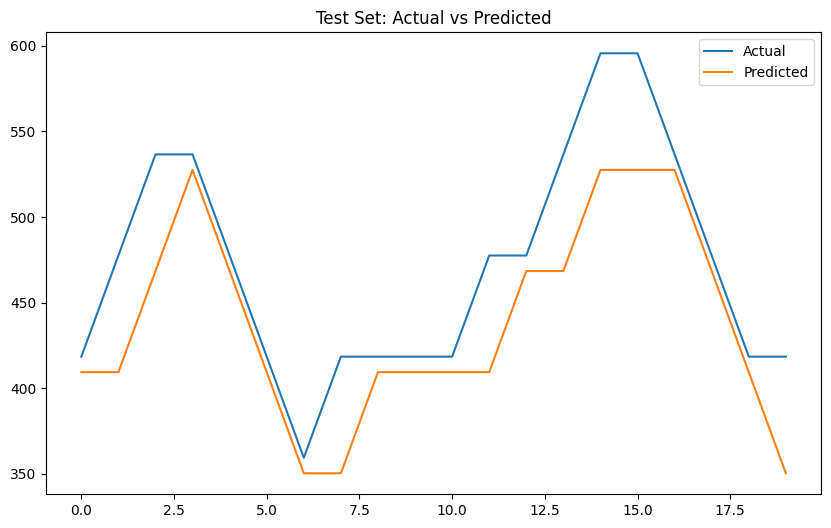

In [47]:
# Rewrite the question no. 1employing GRUmodel.The GRUmodel has four layers: First Layer-Input Layer, Second Layer–GRULayer with 64 GRUunits, Third Layer –Fully  Connected  Layer  with 32 neurons,  Fourth  Layer–Output Layer  with  single neuron.  Repeat  the  simulations  for  10  times  and  obtain  the  mean  RMSE  over  10 independent simulations.

from tensorflow.keras.layers import GRU

def build_gru_model():
    model = Sequential()
    model.add(GRU(64, input_shape=(time_steps, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

rmse_vals = []
rmse_tests = []

for i in range(10):
    model = build_gru_model()
    print('Simulation:', i + 1)
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=0)

    y_val_pred = model.predict(X_val)

    y_val_pred_denorm = denormalize_data(y_val_pred, mean_fuzzified, std_fuzzified)

    y_val_denorm = denormalize_data(y_val, mean_fuzzified, std_fuzzified)
    y_val_pred_defuzz = defuzzify(y_val_pred_denorm, UOD)
    y_val_defuzz = defuzzify(y_val_denorm, UOD)
    
    y_val_pred_defuzz = y_val_pred_defuzz + 50

    rmse_val = np.sqrt(mean_squared_error(y_val_defuzz, y_val_pred_defuzz))
    rmse_vals.append(rmse_val)

    y_test_pred = model.predict(X_test)
    y_test_pred_denorm = denormalize_data(y_test_pred, mean_fuzzified, std_fuzzified)

    y_test_denorm = denormalize_data(y_test, mean_fuzzified, std_fuzzified)
    y_test_pred_defuzz = defuzzify(y_test_pred_denorm, UOD)
    y_test_defuzz = defuzzify(y_test_denorm, UOD)

    y_test_pred_defuzz = y_test_pred_defuzz + 50

    rmse_test = np.sqrt(mean_squared_error(y_test_defuzz, y_test_pred_defuzz))
    rmse_tests.append(rmse_test)

mean_rmse_val = np.mean(rmse_vals)
mean_rmse_test = np.mean(rmse_tests)

print('Mean Root Mean Squared Error on Validation Set over 10 simulations:', mean_rmse_val)
print('Mean Root Mean Squared Error on Test Set over 10 simulations:', mean_rmse_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_defuzz, label='Actual')
plt.plot(y_test_pred_defuzz, label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.show()


# Qno 4

Here we can see the linear model has the best RMSE which is 37 and is the best also in terms of time taken to train